In [105]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.model_selection import  train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

In [106]:
df = pd.read_csv('Stock_CSV/FB.csv', header = 0)

In [107]:
stock_prices = df['4. close'].iloc[::-1]

In [108]:
stock_prices

1976     38.2318
1975     34.0300
1974     31.0000
1973     32.0000
1972     33.0300
          ...   
4       148.1000
3       160.9800
2       156.2100
1       163.3400
0       156.7900
Name: 4. close, Length: 1977, dtype: float64

In [109]:
stock_prices = stock_prices.values.astype('float32')
stock_prices = stock_prices.reshape(len(stock_prices), 1)
scaler = MinMaxScaler(feature_range=(0, 1))
stock_prices = scaler.fit_transform(stock_prices)

In [110]:
stock_prices

array([[0.09976985],
       [0.07932322],
       [0.06457877],
       ...,
       [0.6738703 ],
       [0.70856595],
       [0.6766926 ]], dtype=float32)

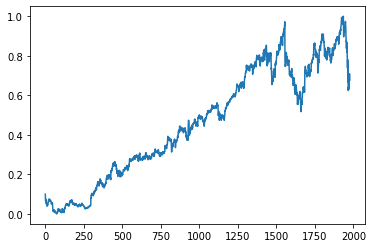

In [111]:
plt.plot(stock_prices)

In [112]:
train_size = int(len(stock_prices) * .8)
test_size = len(stock_prices) - train_size

In [113]:
train, test = stock_prices[0:train_size,:], stock_prices[train_size:len(stock_prices),:]

In [114]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [119]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [120]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [121]:
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
  


compilation time :  0.01566290855407715


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  from ipykernel import kernelapp as app


In [122]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    nb_epoch=100,
    validation_split=0.05)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1500 samples, validate on 79 samples
Epoch 1/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1382 - val_loss: 0.4187
Epoch 2/100
1500/1500 [==============================] - 0s 175us/step - loss: 0.0643 - val_loss: 0.1922
Epoch 3/100
1500/1500 [==============================] - 1s 371us/step - loss: 0.0303 - val_loss: 0.0872
Epoch 4/100
1500/1500 [==============================] - 0s 153us/step - loss: 0.0224 - val_loss: 0.0471
Epoch 5/100
1500/1500 [==============================] - 0s 296us/step - loss: 0.0157 - val_loss: 0.0298
Epoch 6/100
1500/1500 [==============================] - 1s 335us/step - loss: 0.0084 - val_loss: 0.0085
Epoch 7/100
1500/1500 [==============================] - 1s 487us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 8/100
1500/1500 [==============================] - 0s 251us/step - loss: 0.0019 - val_loss: 0.0014
Epoch 9/100
1500/1500 [==============================] - 0s 277us/step - loss: 0.0019 - val_loss: 8.4334e-04
Epoch 1

1500/1500 [==============================] - 0s 298us/step - loss: 8.1522e-04 - val_loss: 9.1948e-04
Epoch 76/100
1500/1500 [==============================] - 0s 272us/step - loss: 7.2728e-04 - val_loss: 6.3458e-04
Epoch 77/100
1500/1500 [==============================] - 0s 157us/step - loss: 8.2016e-04 - val_loss: 6.8974e-04
Epoch 78/100
1500/1500 [==============================] - 0s 194us/step - loss: 7.1803e-04 - val_loss: 0.0013
Epoch 79/100
1500/1500 [==============================] - 0s 207us/step - loss: 7.7338e-04 - val_loss: 6.6166e-04
Epoch 80/100
1500/1500 [==============================] - 0s 176us/step - loss: 9.0254e-04 - val_loss: 7.9148e-04
Epoch 81/100
1500/1500 [==============================] - 0s 154us/step - loss: 7.5365e-04 - val_loss: 0.0010
Epoch 82/100
1500/1500 [==============================] - 0s 153us/step - loss: 8.4954e-04 - val_loss: 6.4472e-04
Epoch 83/100
1500/1500 [==============================] - 0s 174us/step - loss: 7.1984e-04 - val_loss: 7.6498

In [123]:
def plot_results_multiple(predicted_data, true_data,length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.show()

[[0.76419806]]
[[1.528691]]
[[2.8182623]]
[[4.362216]]
[[5.2714305]]
[[ 174.77246]
 [ 331.87653]
 [ 596.88464]
 [ 914.1687 ]
 [1101.0132 ]]


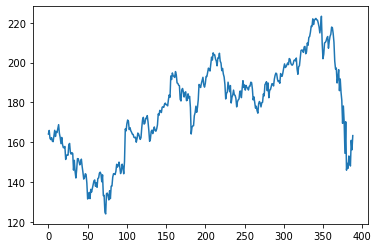

In [133]:
#predict lenght consecutive values from a real one
def predict_sequences_multiple(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue
    
    for i in range(length): 
        predicted = []        
        
        print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        
        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)
        
        prediction_seqs.append(predicted[-1])
        
    return prediction_seqs

predict_length=5
predictions = predict_sequences_multiple(model, testX[0], predict_length)
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
plot_results_multiple(predictions, testY, predict_length)


In [125]:
model.predict(testX)

array([[0.76419806],
       [0.75523734],
       [0.73376036],
       [0.715015  ],
       [0.6930676 ],
       [0.69547707],
       [0.7008609 ],
       [0.7091672 ],
       [0.690563  ],
       [0.68753767],
       [0.6920754 ],
       [0.68384945],
       [0.6825251 ],
       [0.69557154],
       [0.7095446 ],
       [0.6949574 ],
       [0.7066666 ],
       [0.70430696],
       [0.71393055],
       [0.7228378 ],
       [0.7021829 ],
       [0.69264233],
       [0.67793614],
       [0.692595  ],
       [0.6756645 ],
       [0.6684677 ],
       [0.6680888 ],
       [0.671167  ],
       [0.6402508 ],
       [0.6496011 ],
       [0.6514513 ],
       [0.65040755],
       [0.675333  ],
       [0.6783619 ],
       [0.6570473 ],
       [0.6529217 ],
       [0.65638345],
       [0.6545341 ],
       [0.6148674 ],
       [0.6382088 ],
       [0.61167884],
       [0.59605765],
       [0.61572397],
       [0.64219725],
       [0.64200747],
       [0.6353589 ],
       [0.62742305],
       [0.633